In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
%matplotlib inline
import warnings  
import seaborn as sns
from sklearn.model_selection import train_test_split 

# Visualization For Year 2020

In [109]:
data_2020=pd.read_csv('2020.csv', delimiter=',')
data_2020.head(155)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_Residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [3]:
data_2020.shape

(153, 20)

In [4]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_name                               153 non-null    object 
 1   Regional_indicator                         153 non-null    object 
 2   Ladder_score                               153 non-null    float64
 3   Standard_error_of_ladder score             153 non-null    float64
 4   upperwhisker                               153 non-null    float64
 5   lowerwhisker                               153 non-null    float64
 6   Logged_GDP_per_capita                      153 non-null    float64
 7   Social_support                             153 non-null    float64
 8   Healthy_life_expectancy                    153 non-null    float64
 9   Freedom_to_make_life_choices               153 non-null    float64
 10  Generosity                

In [5]:
data_2020.describe()

,Ladder_score,Standard_error_of_ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_Residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.000000,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


In [6]:
data2020 = data_2020[['Country_name','Regional_indicator','Ladder_score','Logged_GDP_per_capita','Social_support',
                      'Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']]
data2020.sort_values(by="Ladder_score", ascending=True).head(10)

,Country_name,Regional_indicator,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
152,Afghanistan,South Asia,2.5669,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
147,Tanzania,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799
146,Botswana,Sub-Saharan Africa,3.4789,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931
145,Yemen,Middle East and North Africa,3.5274,7.759683,0.817981,56.727283,0.599920,-0.157735,0.800288
144,Malawi,Sub-Saharan Africa,3.5380,7.062226,0.544007,57.592888,0.803223,0.021433,0.731701
143,India,South Asia,3.5733,8.849824,0.592201,60.215187,0.881445,0.057552,0.772043


In [7]:
data_2020.sort_values(by="Ladder_score", ascending=False).head(10)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_Residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [8]:
data_2020.sort_values(by="Ladder_score", ascending=True).head(10)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_Residual
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
147,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963
146,Botswana,Sub-Saharan Africa,3.4789,0.060543,3.597564,3.360236,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931,1.972317,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241
145,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,-0.157735,0.800288,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473
144,Malawi,Sub-Saharan Africa,3.5380,0.070261,3.675711,3.400290,7.062226,0.544007,57.592888,0.803223,0.021433,0.731701,1.972317,0.176535,0.530368,0.446163,0.487390,0.213185,0.131634,1.552718
143,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,0.057552,0.772043,1.972317,0.730576,0.644199,0.540570,0.581142,0.237072,0.105588,0.734131


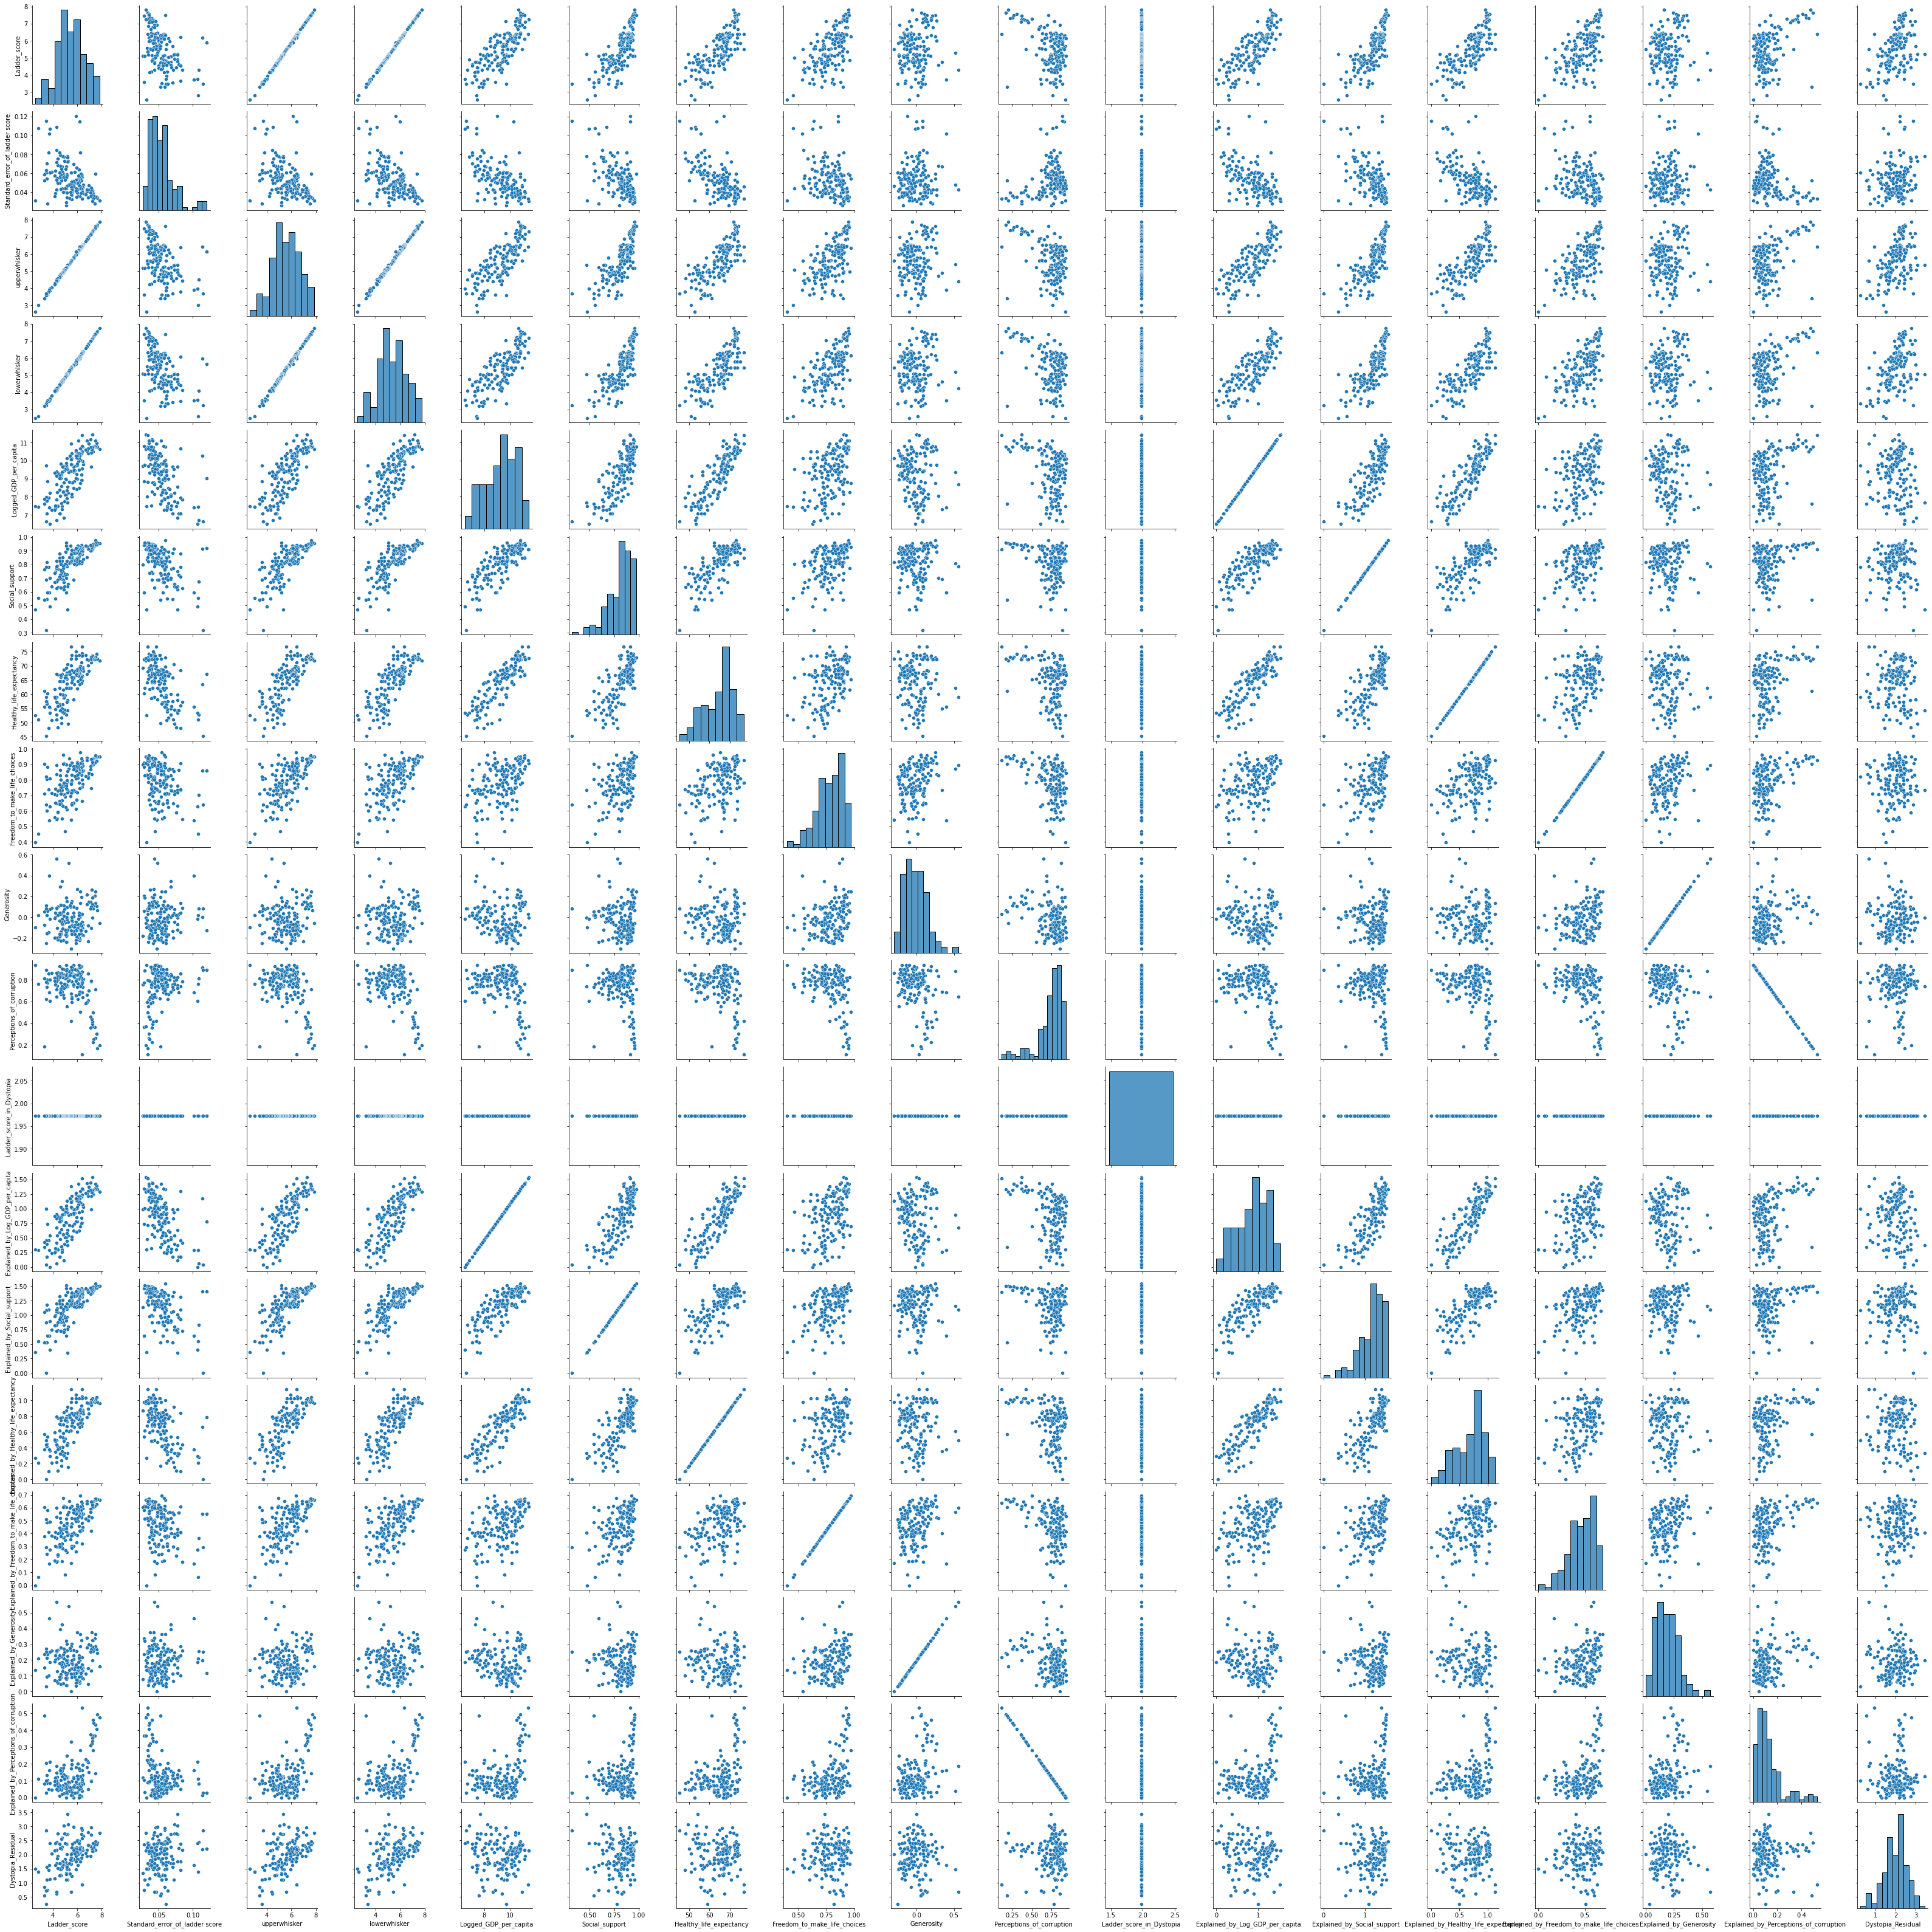

In [9]:
sns.pairplot(data_2020)
plt.show()

In [10]:
avg_happiness = data_2020.groupby("Regional_indicator").mean()
print(avg_happiness)

                                    Ladder_score  \
Regional_indicator                                 
Central and Eastern Europe              5.883818   
Commonwealth of Independent States      5.358342   
East Asia                               5.714850   
Latin America and Caribbean             5.981786   
Middle East and North Africa            5.227159   
North America and ANZ                   7.173525   
South Asia                              4.475443   
Southeast Asia                          5.383367   
Sub-Saharan Africa                      4.383495   
Western Europe                          6.899219   

                                    Standard_error_of_ladder score  \
Regional_indicator                                                   
Central and Eastern Europe                                0.043896   
Commonwealth of Independent States                        0.042306   
East Asia                                                 0.039475   
Latin America and Caribbe

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


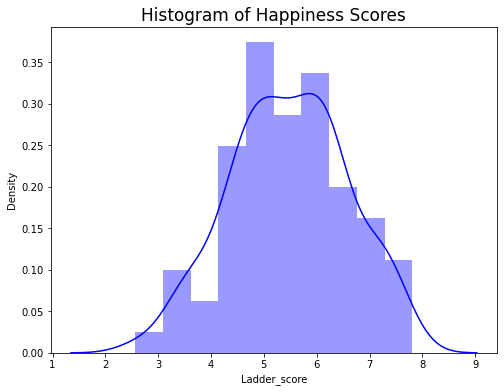

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(data_2020['Ladder_score'], kde=True, color='blue')
plt.title('Histogram of Happiness Scores', fontsize=17);

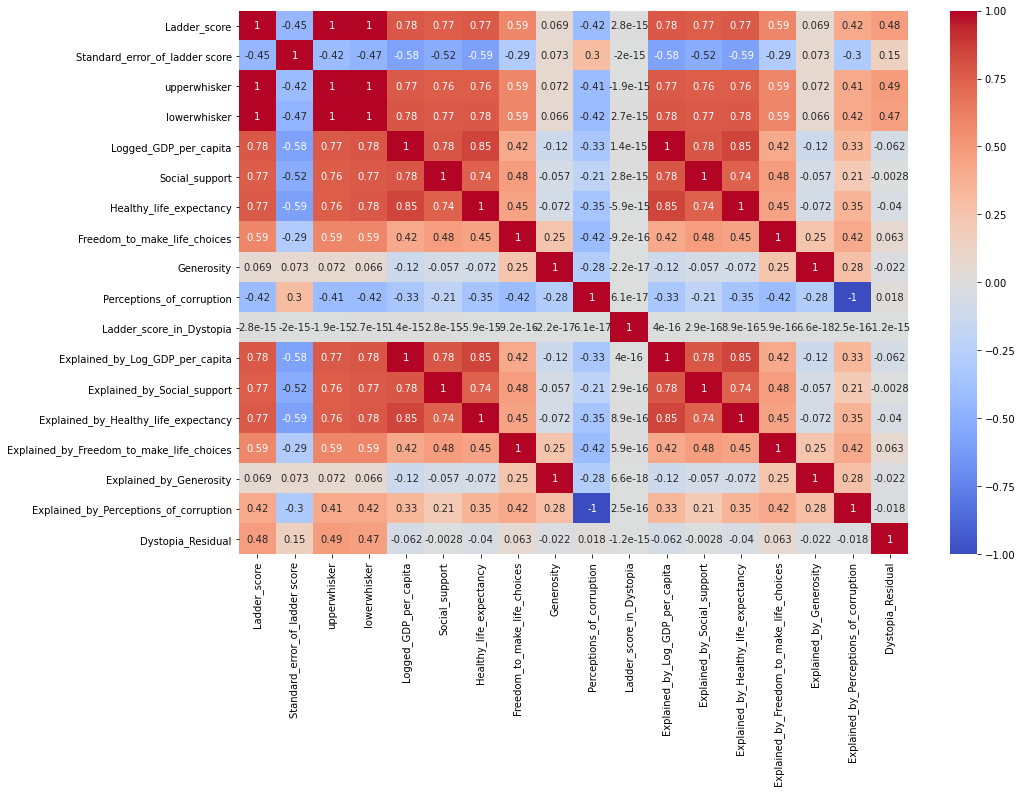

In [12]:
# установить размер графика
plt.figure(figsize = (15,10))
# создать тепловую карту корреляций 
sns.heatmap(data_2020.corr(),cmap ='coolwarm',annot = True);

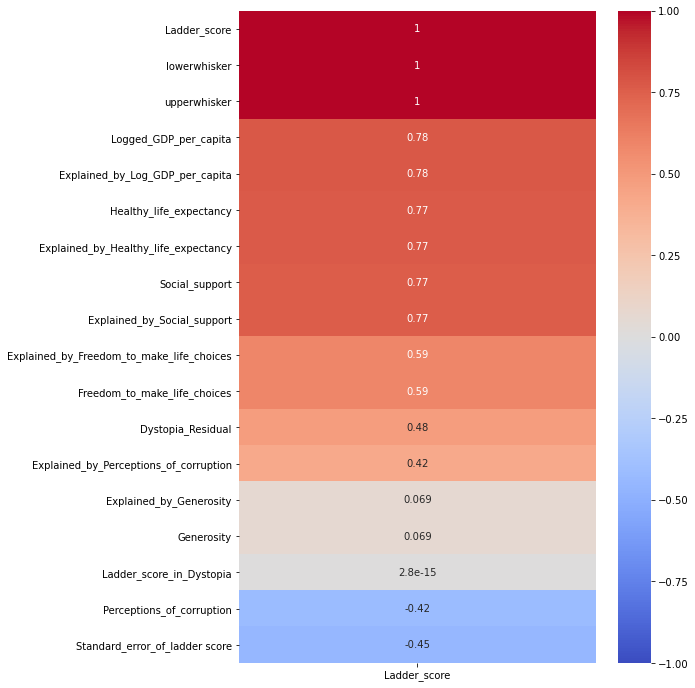

In [13]:
# установить размер графика 
plt.figure(figsize = (8,12))
# создать тепловую карту 
sns.heatmap(data_2020.corr()[['Ladder_score']].sort_values('Ladder_score', ascending = False),
             annot = True, 
             cmap = 'coolwarm', 
             vmin = -1, 
             vmax = 1);

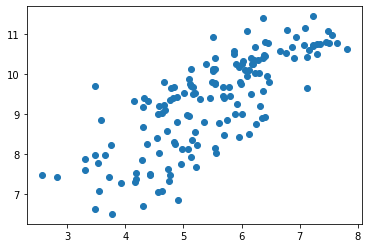

In [14]:
plt.scatter(data_2020['Ladder_score'],data_2020['Logged_GDP_per_capita']); 
# график рассеивания

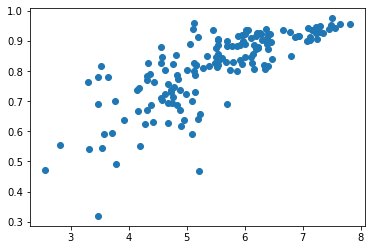

In [15]:
plt.scatter(data_2020['Ladder_score'], data_2020['Social_support']);

In [16]:
maxSupport=np.max(data_2020["Social_support"])
maxSupport

0.9746695759999999

In [17]:
maxEconomy=np.max(data_2020["Logged_GDP_per_capita"])
maxEconomy

11.45068073

In [18]:
data_2020[data_2020['Ladder_score']==np.max(data_2020['Ladder_score'])]['Country_name']

0    Finland
Name: Country_name, dtype: object

In [19]:
minSupport=np.min(data_2020["Social_support"])
minSupport

0.31945985600000004

In [20]:
minEconomy=np.min(data_2020["Logged_GDP_per_capita"])
minEconomy

6.492642403

In [21]:
data_2020[data_2020['Ladder_score']==np.min(data_2020['Ladder_score'])]['Country_name']

152    Afghanistan
Name: Country_name, dtype: object

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


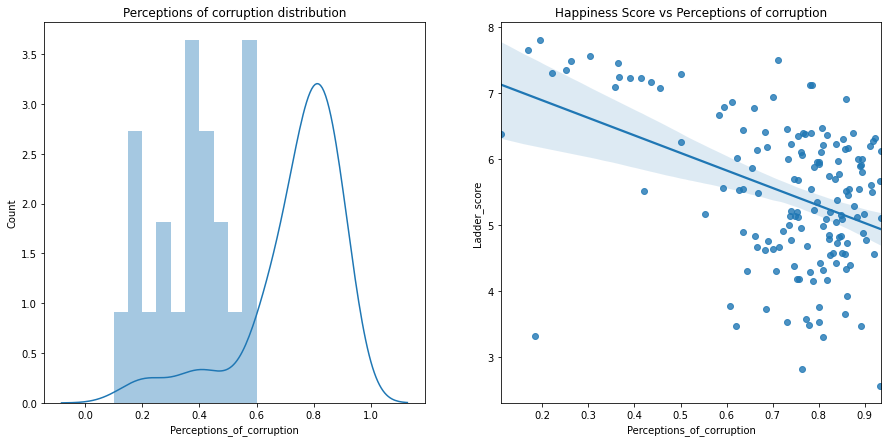

In [22]:
plt.figure(figsize= (15,7))

plt.subplot(1,2,1)
plt.title("Perceptions of corruption distribution")
sns.distplot(a=data_2020['Perceptions_of_corruption'], bins =np.arange(0, 0.45+0.2,0.05))
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.title("Happiness Score vs Perceptions of corruption")
sns.regplot(data=data_2020, x='Perceptions_of_corruption', y='Ladder_score');

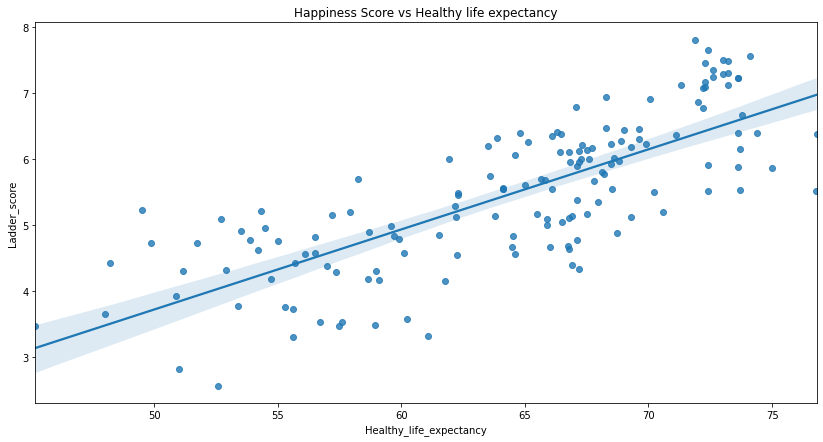

In [23]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Healthy life expectancy")
sns.regplot(data=data_2020, x='Healthy_life_expectancy', y='Ladder_score');

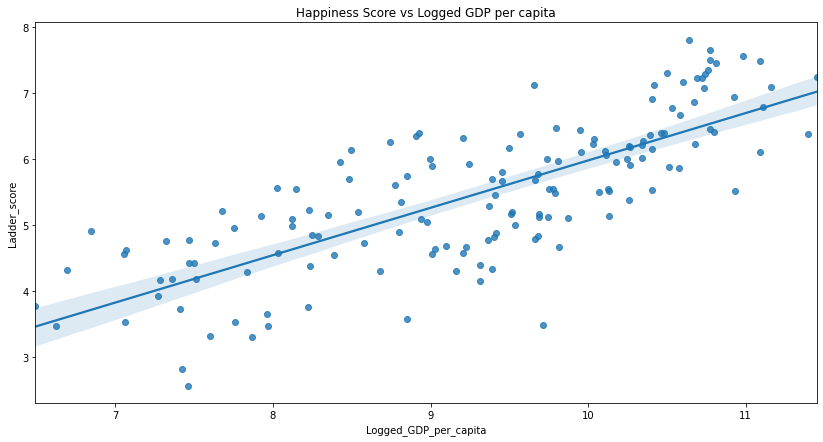

In [24]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Logged GDP per capita")
sns.regplot(data=data_2020, x='Logged_GDP_per_capita', y='Ladder_score');

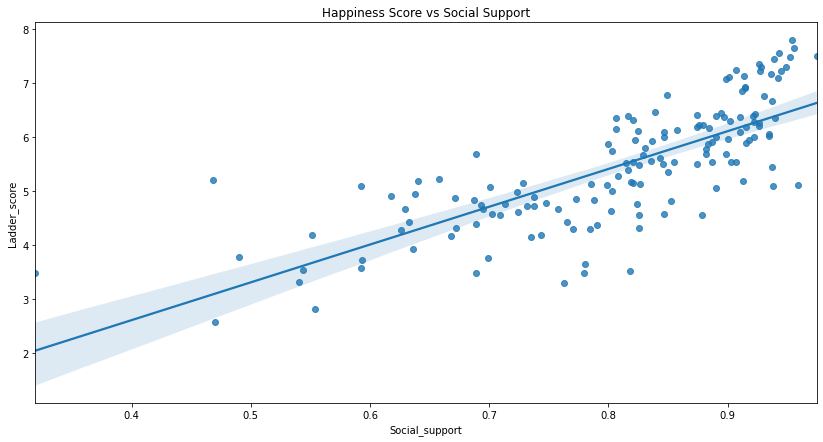

In [25]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Social Support")
sns.regplot(data=data_2020, x='Social_support', y='Ladder_score');

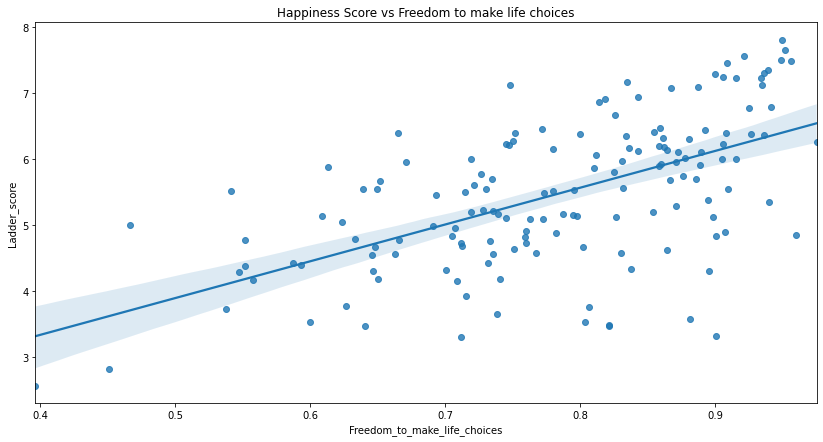

In [26]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Freedom to make life choices")
sns.regplot(data=data_2020, x='Freedom_to_make_life_choices', y='Ladder_score');

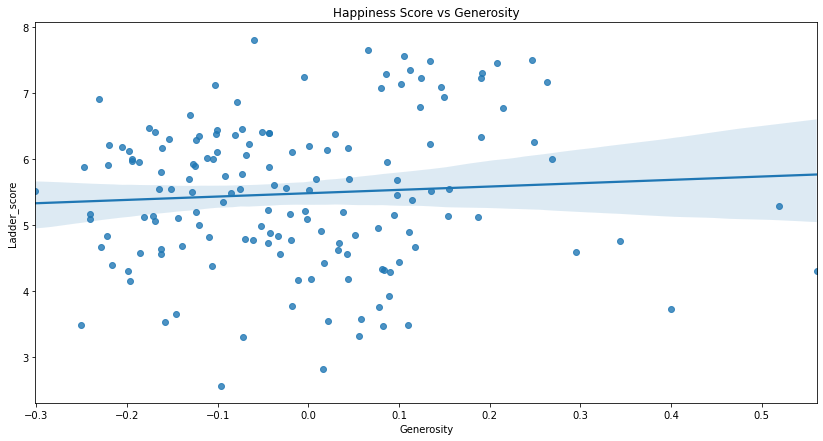

In [27]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Generosity")
sns.regplot(data=data_2020, x='Generosity', y='Ladder_score');

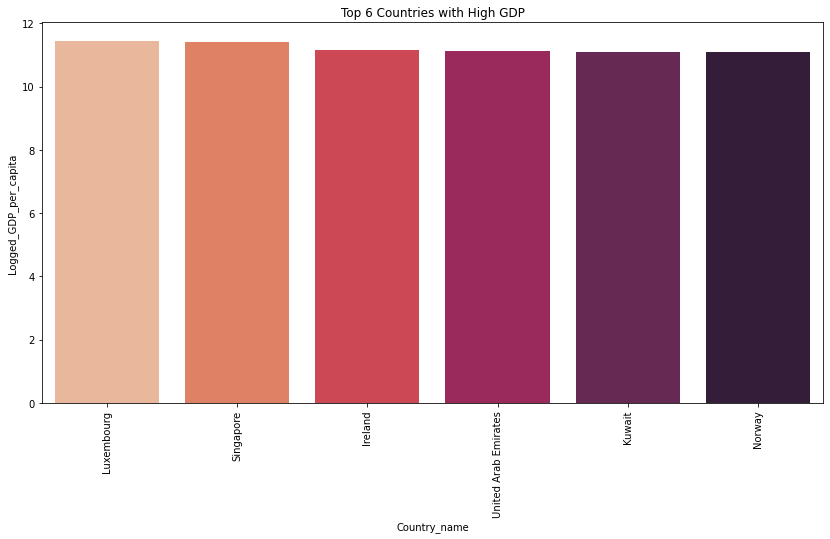

In [28]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with High GDP")
sns.barplot(data=data_2020.sort_values('Logged_GDP_per_capita', ascending= False).head(6), y='Logged_GDP_per_capita', x='Country_name', palette='rocket_r')
plt.xticks(rotation=90);

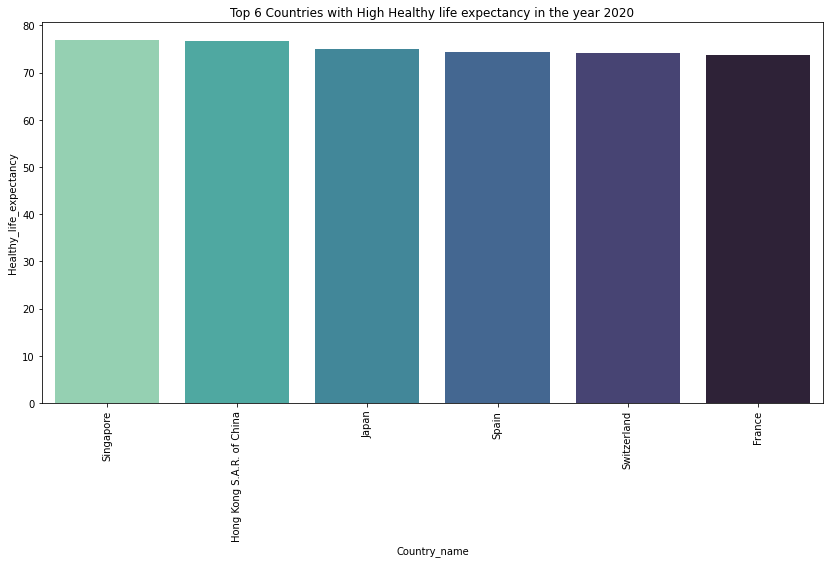

In [29]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with High Healthy life expectancy in the year 2020")
sns.barplot(data = data_2020.sort_values('Healthy_life_expectancy', ascending= False).head(6), x='Country_name', y='Healthy_life_expectancy', palette = 'mako_r')
plt.xticks(rotation=90);

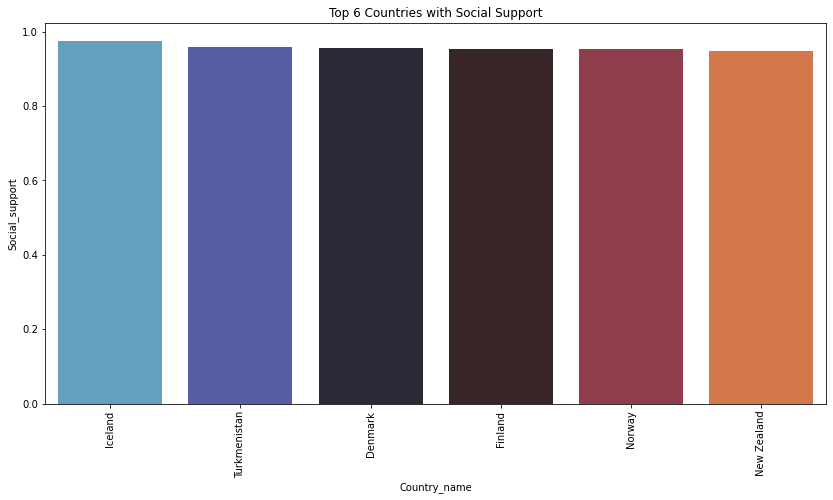

In [30]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with Social Support")
sns.barplot(data = data_2020.sort_values('Social_support', ascending= False).head(6), x='Country_name', y='Social_support', palette='icefire')
plt.xticks(rotation=90);

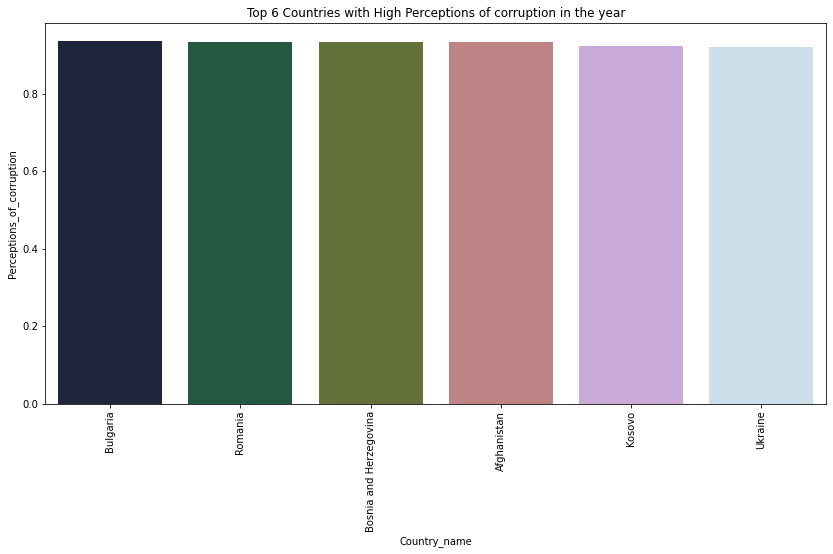

In [31]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with High Perceptions of corruption in the year")
sns.barplot(data=data_2020.sort_values('Perceptions_of_corruption', ascending= False).head(6), x='Country_name', y='Perceptions_of_corruption', palette='cubehelix')
plt.xticks(rotation=90);

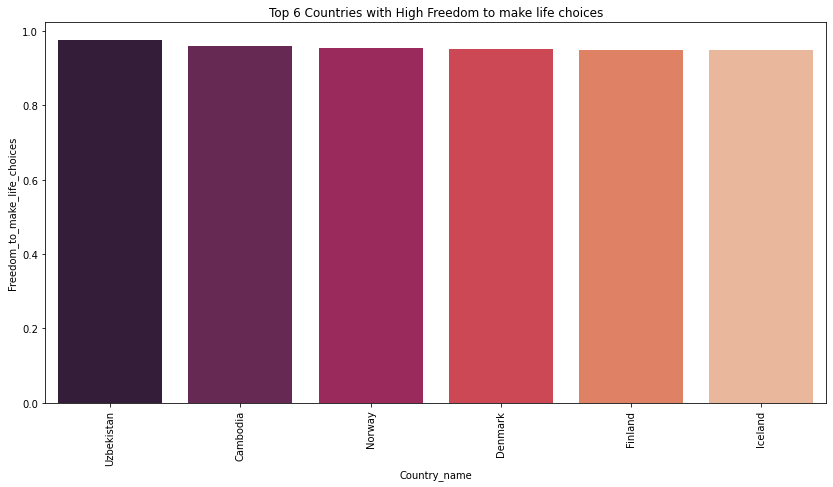

In [32]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with High Freedom to make life choices")
sns.barplot(data = data_2020.sort_values('Freedom_to_make_life_choices', ascending= False).head(6), x='Country_name', y='Freedom_to_make_life_choices', palette='rocket')
plt.xticks(rotation=90);

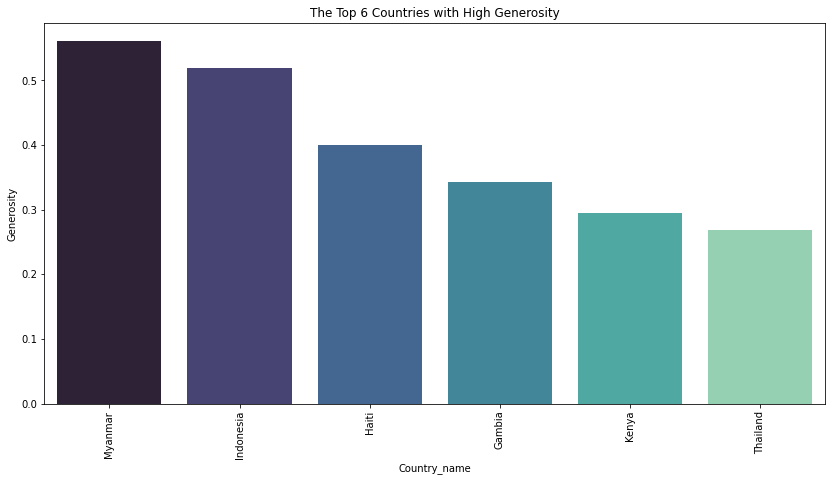

In [33]:
plt.figure(figsize=(14,7))

plt.title("The Top 6 Countries with High Generosity")
sns.barplot(data = data_2020.sort_values('Generosity', ascending= False).head(6), x='Country_name', y='Generosity', palette='mako')
plt.xticks(rotation=90);

In [34]:
# ds = data_2020.Regional_indicator.value_counts()
# plt.figure(figsize=(10,7))
# sns.barplot(x = ds.index, y = ds.values, palette = 'vlag')
# plt.xlabel('Regional_indicator')
# plt.xticks(rotation = 90)
# plt.ylabel('Number of Countries')
# plt.title('Number of Countries According to the Region', color = 'blue', fontsize = 20)
# plt.show(),
# heatmap.set_xticklabels(
#     heatmap.get_xticklabels(),
#     rotation=60,
#     horizontalalignment='right'
# );

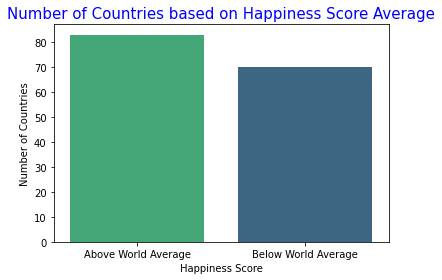

In [35]:
above_mean_HS =['Above World Average' if i >= 5.35 else 'Below World Average' for i in data_2020.Ladder_score]
ds = pd.DataFrame({'Ladder_score' : above_mean_HS})
sns.countplot(x = ds.Ladder_score, palette = 'viridis_r')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Number of Countries based on Happiness Score Average', color = 'blue', fontsize = 15)
plt.show()

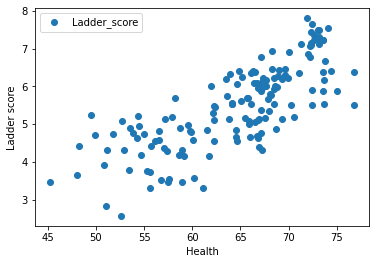

In [36]:
# Step 4: Visualize the change in the variables  
data_2020.plot(x ='Healthy_life_expectancy', y ='Ladder_score', style ='o' )
plt.xlabel('Health')
plt.ylabel('Ladder score')
plt.show()

# Combining The Data

In [37]:
data_2015 = pd.read_csv('2015.csv', delimiter=',')
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [38]:
data_2015 = pd.read_csv('2015.csv', delimiter=',')
data_2015.rename(columns={"Family" : "Social support"},inplace = True)
data_2015['Year'] = '2015'
data2015 = data_2015[['Country','Happiness Score','Economy (GDP per Capita)','Social support','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Social support                 158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Year                           158 non-null    object 
dtypes: float64(7), object(2)
memory usage: 11.2+ KB


In [39]:
data_2016 = pd.read_csv('2016.csv', delimiter=',')
data_2016['Year'] = 2016
data_2016.rename(columns={"Family" : "Social support"},inplace = True)
data2016 = data_2016[['Country','Happiness Score','Economy (GDP per Capita)','Social support','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Happiness Score                157 non-null    float64
 2   Economy (GDP per Capita)       157 non-null    float64
 3   Social support                 157 non-null    float64
 4   Health (Life Expectancy)       157 non-null    float64
 5   Freedom                        157 non-null    float64
 6   Trust (Government Corruption)  157 non-null    float64
 7   Generosity                     157 non-null    float64
 8   Year                           157 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


In [40]:
data_2017 = pd.read_csv('2017.csv', delimiter=',')
data_2017.rename(columns={"Happiness.Score": "Happiness Score", "Economy..GDP.per.Capita.": "Economy (GDP per Capita)","Family": "Social support", 
                          "Health..Life.Expectancy.": "Health (Life Expectancy)","Trust..Government.Corruption.": "Trust (Government Corruption)"},
                    inplace = True)
data_2017['Year'] = 2017
data2017 = data_2017[['Country','Happiness Score','Economy (GDP per Capita)','Social support','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Score                155 non-null    float64
 2   Economy (GDP per Capita)       155 non-null    float64
 3   Social support                 155 non-null    float64
 4   Health (Life Expectancy)       155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Trust (Government Corruption)  155 non-null    float64
 7   Generosity                     155 non-null    float64
 8   Year                           155 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [41]:
data_2018 = pd.read_csv('2018.csv', delimiter=',')
data_2018.rename(columns={"Country or region": "Country", "Score": "Happiness Score", "GDP per capita": "Economy (GDP per Capita)",
                         "Healthy life expectancy": "Health (Life Expectancy)","Freedom to make life choices": "Freedom",
                         "Perceptions of corruption": "Trust (Government Corruption)"}, inplace = True)
data_2018['Year'] = 2018
data2018 = data_2018[['Country','Happiness Score','Economy (GDP per Capita)','Social support','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Social support                 156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Trust (Government Corruption)  155 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Year                           156 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [42]:
is_NaN = data2018.isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = data2018[row_has_NaN]
print(rows_with_NaN)

                 Country  Happiness Score  Economy (GDP per Capita)  \
19  United Arab Emirates            6.774                     2.096   

    Social support  Health (Life Expectancy)  Freedom  \
19           0.776                      0.67    0.284   

    Trust (Government Corruption)  Generosity  Year  
19                            NaN       0.186  2018  


In [43]:
corruption_15 = data2015.loc[data2015['Country'] == 'United Arab Emirates']
corruption_15 = corruption_15['Trust (Government Corruption)'].values.item()
corruption_15

0.38583

In [44]:
corruption_16 = data2016.loc[data2016['Country'] == 'United Arab Emirates']
corruption_16 = corruption_16['Trust (Government Corruption)'].values.item()
corruption_16

0.35561

In [45]:
corruption_17 = data2017.loc[data2017['Country'] == 'United Arab Emirates']
corruption_17 = corruption_17['Trust (Government Corruption)'].values.item()
corruption_17

0.324489563703537

In [46]:
corruption_mean = np.mean([corruption_15,corruption_16,corruption_17])
corruption_mean

0.35530985456784564

In [47]:
data2018.loc[data2018.Country == 'United Arab Emirates', 'Trust (Government Corruption)'] = corruption_mean
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Social support                 156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Trust (Government Corruption)  156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Year                           156 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [48]:
data_2019 = pd.read_csv('2019.csv', delimiter=',')
data_2019['Year'] = 2019
data_2019.rename(columns={"Country or region": "Country","Score": "Happiness Score","GDP per capita": "Economy (GDP per Capita)",
                         "Healthy life expectancy": "Health (Life Expectancy)", "Freedom to make life choices": "Freedom",
                         "Perceptions of corruption": "Trust (Government Corruption)"}, inplace = True)
data2019 = data_2019[['Country','Happiness Score','Economy (GDP per Capita)','Social support','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity','Year']]
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Social support                 156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Trust (Government Corruption)  156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Year                           156 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [49]:
merged_happiness  = pd.concat([data2015, data2016, data2017, data2018, data2019], ignore_index = True)
merged_happiness.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [50]:
merged_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Happiness Score                782 non-null    float64
 2   Economy (GDP per Capita)       782 non-null    float64
 3   Social support                 782 non-null    float64
 4   Health (Life Expectancy)       782 non-null    float64
 5   Freedom                        782 non-null    float64
 6   Trust (Government Corruption)  782 non-null    float64
 7   Generosity                     782 non-null    float64
 8   Year                           782 non-null    object 
dtypes: float64(7), object(2)
memory usage: 55.1+ KB


In [51]:
merged_happiness.describe()

,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125730,0.218576
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.106068,0.122321
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.156243,0.278832
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


<AxesSubplot:xlabel='Year', ylabel='Happiness Score'>

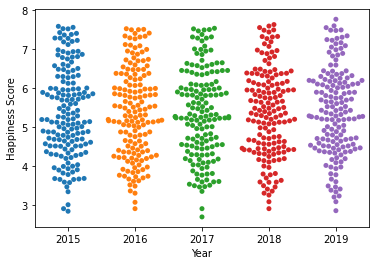

In [52]:
sns.swarmplot(x="Year", y="Happiness Score",data=merged_happiness)

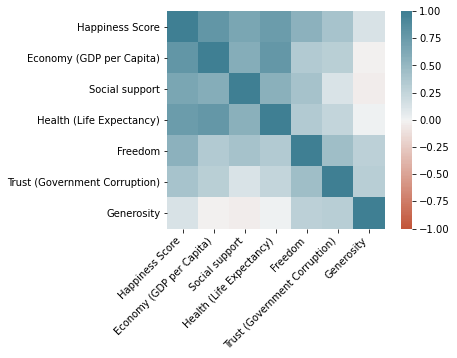

In [53]:
heatmap = sns.heatmap(
    merged_happiness.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

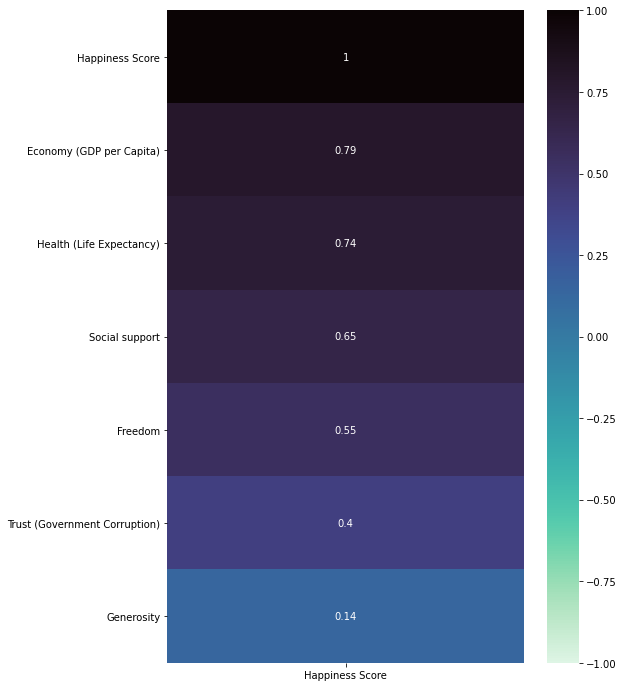

In [54]:
# установить размер графика 
plt.figure(figsize = (8,12))
# создать тепловую карту 
sns.heatmap(merged_happiness.corr()[['Happiness Score']].sort_values('Happiness Score', ascending = False),
             annot = True, 
             cmap = 'mako_r', 
             vmin = -1, 
             vmax = 1);

# Prediction

In [55]:
X = merged_happiness[['Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
y = merged_happiness[['Happiness Score']]
X.round(3)
y.round(3)

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
777,3.334
778,3.231
779,3.203
780,3.083


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Regression 

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

In [58]:
linear_error = mean_squared_error(y_test, lin_pred)
print("The Mean Squared Error For Linear Regression is: {}".format(linear_error))

The Mean Squared Error For Linear Regression is: 0.35458224412462336


In [59]:
# print('MAE_Linear Regression=', metrics.mean_absolute_error(y_test,lin_pred))
# print('MSE_Linear Regression=', metrics.mean_squared_error(y_test,lin_pred))
# print('RMSE_Linear Regression=', np.sqrt(metrics.mean_squared_error(y_test,lin_pred)))
# print('MAPE_Support Vector Regression=', 100*metrics.mean_absolute_error(y_test,lin_pred)/merged_happiness['Happiness Score'].mean())
# print('R2 Score_Support Vector Regression=',metrics.r2_score(y_test,lin_pred))

In [60]:
print('Training accuracy:', lin_model.score(X_train, y_train))
print('Test accuracy:',lin_model.score(X_test, y_test))

Training accuracy: 0.7567080655917342
Test accuracy: 0.7169079615459619


In [61]:
# score=r2_score (y_test, lin_pred) 
# print (score)
# lin_model.score(X_test,y_test)

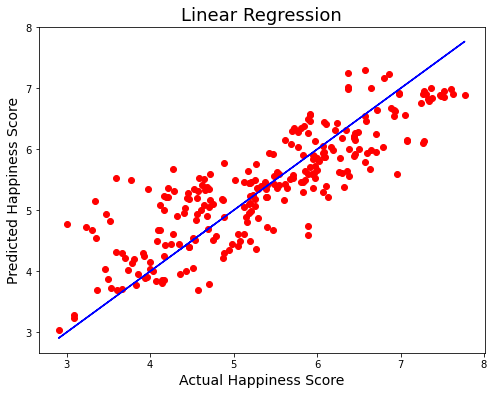

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,lin_pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

## LinearSVR 

In [63]:
from sklearn.svm import LinearSVR
svr_model = LinearSVR()
svr_model.fit(X_train, y_train.values.ravel())
svr_pred = svr_model.predict(X_test)
svr_error = mean_squared_error(y_test, svr_pred)

In [64]:
print("The Mean Squared Error For Linear SVR is: {}".format(svr_error))

The Mean Squared Error For Linear SVR is: 0.3653351234023929


In [65]:
score=r2_score (y_test, svr_pred) 
print (score)

0.7083230575795803


In [66]:
print('Training accuracy:', svr_model.score(X_train, y_train))
print('Test accuracy:',svr_model.score(X_test, y_test))

Training accuracy: 0.7467594775977944
Test accuracy: 0.7083230575795803


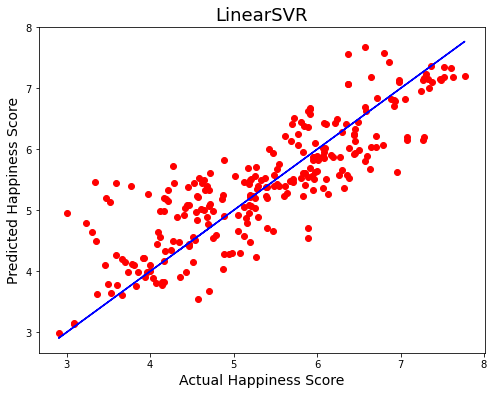

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,svr_pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('LinearSVR',fontsize=18)
plt.show()

## RandomForestRegressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
rm_model = RandomForestRegressor(n_estimators=500, max_leaf_nodes=20, n_jobs=-1)
rm_model.fit(X_train, y_train.values.ravel())
rm_pred = rm_model.predict(X_test)
rm_error = mean_squared_error(y_test, rm_pred)

In [69]:
print("The Mean Squared Error For RandomForestRegressor is: {}".format(rm_error))

The Mean Squared Error For RandomForestRegressor is: 0.2860380547124459


In [70]:
score=r2_score (y_test, rm_pred) 
print (score)

0.7716324003084767


In [71]:
print('Training accuracy:', rm_model.score(X_train, y_train))
print('Test accuracy:',rm_model.score(X_test, y_test))

Training accuracy: 0.8607698262875288
Test accuracy: 0.7716324003084768


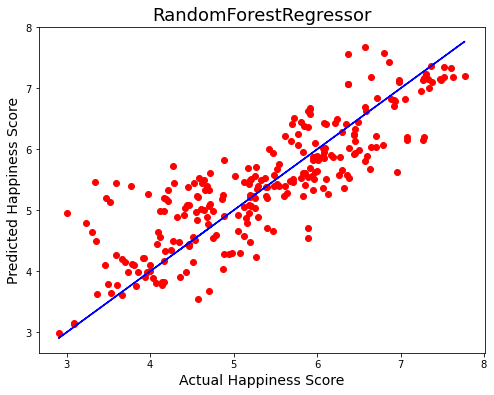

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,svr_pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

## Decision Tree Regression

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr_model=DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)
dtr_pred=dtr_model.predict(X_test)
dtr_error = mean_squared_error(y_test, dtr_pred)

In [74]:
print("The Mean Squared Error For DecisionTreeRegression is: {}".format(dtr_error))

The Mean Squared Error For DecisionTreeRegression is: 0.5250375550695379


In [75]:
score=r2_score (y_test, dtr_pred) 
print (score)

0.5808195300458415


In [76]:
print('Training accuracy:', dtr_model.score(X_train, y_train))
print('Test accuracy:',dtr_model.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.5808195300458415


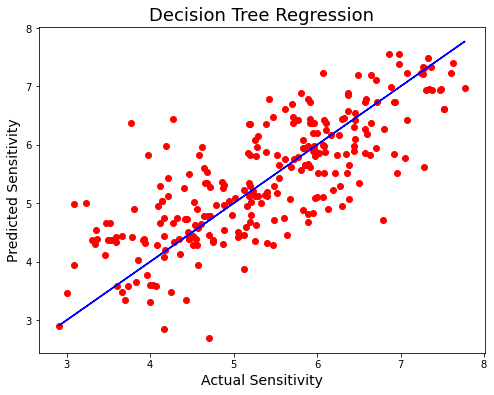

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,dtr_pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

## Support Vector Regression

In [78]:
from sklearn.svm import SVR
svr_model=SVR(gamma='auto')
svr_model.fit(X_train,y_train)
svr_pred=svr_model.predict(X_test)
svr_error = mean_squared_error(y_test, svr_pred)

In [79]:
print("The Mean Squared Error For SupportVectorRegression is: {}".format(svr_error))

The Mean Squared Error For SupportVectorRegression is: 0.34541891661374086


In [80]:
score=r2_score (y_test, svr_pred) 
print (score)

0.7242237961853466


In [81]:
print('Training accuracy:', svr_model.score(X_train, y_train))
print('Test accuracy:',svr_model.score(X_test, y_test))

Training accuracy: 0.7642195817965923
Test accuracy: 0.7242237961853466


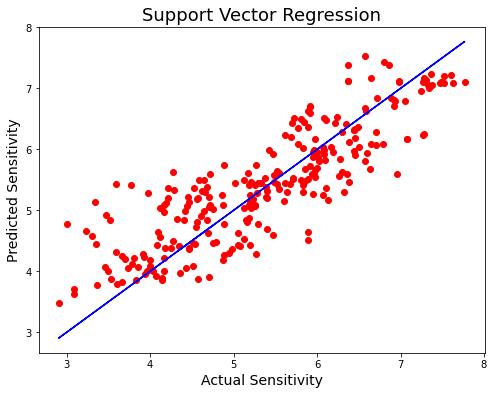

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,svr_pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

## Ridge

In [83]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train,y_train)
print('Ridge score: ',ridge.score(X_test,y_test))

Ridge score:  0.7126091212427905


In [84]:
print('Training accuracy:', ridge.score(X_train, y_train))
print('Test accuracy:',ridge.score(X_test, y_test))

Training accuracy: 0.7544940902031787
Test accuracy: 0.7126091212427905


## GradientBoostingRegressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(alpha=0.85, learning_rate=0.1, loss="ls",
                                              max_features=0.9, min_samples_leaf=5,
                                              min_samples_split=6)
results=gbr_model.fit(X_train, y_train)

In [86]:
gbr_pred=gbr_model.predict(X_test)
gbr_error = mean_squared_error(y_test, gbr_pred)

In [87]:
print('Training accuracy:', gbr_model.score(X_train, y_train))
print('Test accuracy:',gbr_model.score(X_test, y_test))

Training accuracy: 0.8937591185599066
Test accuracy: 0.7469040353206127


In [88]:
score = gbr_model.score(X_test, y_test)
print(score)

0.7469040353206127


In [89]:
gbr_error = mean_squared_error(y_test, gbr_pred)

In [90]:
print("The Mean Squared Error For GradientBoostingRegressor is: {}".format(gbr_error))

The Mean Squared Error For GradientBoostingRegressor is: 0.31701115872064345


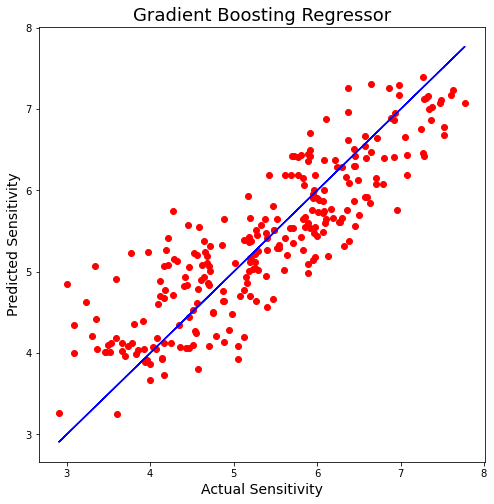

In [91]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,gbr_pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()

# Loading 2020 data

In [92]:
data_2020 = pd.read_csv('2020.csv', delimiter=',')
data_2020.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_Residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [93]:
data_2020.drop(columns=['Generosity'] , inplace = True)
data_2020.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_Residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [108]:
data_2020.rename(columns={'Ladder_score':'Happiness Score',
                          'Explained_by_Log_GDP_per_capita': 'Economy (GDP per Capita)',
                         'Explained_by_Healthy_life_expectancy':'Health (Life Expectancy)',
                          'Explained_by_Freedom_to_make_life_choices':'Freedom',
                         'Explained_by_Perceptions_of_corruption':'Trust (Government Corruption)',
                          'Explained_by_Generosity': 'Generosity'}, inplace=True)
data2020 = data_2020[['Country_name','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity']]
data2020.head(50)

,Country_name,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Finland,7.8087,1.285190,0.961271,0.662317,0.477857,0.159670
1,Denmark,7.6456,1.326949,0.979333,0.665040,0.495260,0.242793
2,Switzerland,7.5599,1.390774,1.040533,0.628954,0.407946,0.269056
3,Iceland,7.5045,1.326502,1.000843,0.661981,0.144541,0.362330
4,Norway,7.4880,1.424207,1.008072,0.670201,0.434101,0.287985
5,Netherlands,7.4489,1.338946,0.975675,0.613626,0.368570,0.336318
6,Sweden,7.3535,1.322235,0.986470,0.650298,0.442066,0.272828
7,New Zealand,7.2996,1.242318,1.008138,0.646790,0.461268,0.325726
8,Austria,7.2942,1.317286,1.000934,0.603369,0.281256,0.255510
9,Luxembourg,7.2375,1.536676,0.986443,0.610137,0.367041,0.195954


In [95]:
X2020 = data2020[['Economy (GDP per Capita)','Health (Life Expectancy)',
                      'Freedom','Trust (Government Corruption)','Generosity']]
y2020 = data2020['Happiness Score']

In [96]:
X2020.head()

,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.285190,0.961271,0.662317,0.477857,0.159670
1,1.326949,0.979333,0.665040,0.495260,0.242793
2,1.390774,1.040533,0.628954,0.407946,0.269056
3,1.326502,1.000843,0.661981,0.144541,0.362330
4,1.424207,1.008072,0.670201,0.434101,0.287985


# Final Output

In [97]:
pred2020 = rm_model.predict(X2020)

In [98]:
mean_2020 = mean_squared_error(y2020, pred2020)

In [99]:
print("The Mean Squared Error is: {}".format(mean_2020))

The Mean Squared Error is: 0.30390444846432785


In [100]:
rscore = rm_model.score(X2020, y2020)
print(rscore)

0.7527340490756923


In [101]:
pred2020

array([6.8166632 , 7.00778418, 7.13807847, 7.15877821, 7.14145895,
       7.16199112, 7.02193679, 6.82567979, 7.00696825, 7.06316415,
       7.09476389, 7.0789212 , 6.67801919, 6.35861056, 6.26535964,
       7.15056809, 6.84140712, 6.82911982, 5.9968926 , 6.31958294,
       7.04383553, 6.97341205, 6.31717066, 5.97494376, 6.29026026,
       6.43592644, 6.50378933, 6.2460158 , 5.72732368, 5.69112817,
       6.97270641, 5.89814312, 6.3449969 , 5.75035111, 5.47251073,
       6.23651823, 5.80380488, 5.79421616, 6.1297449 , 6.97859049,
       6.07916171, 5.89495315, 6.37539486, 5.71203309, 6.10183165,
       5.82342377, 5.87665323, 6.64984953, 6.2086342 , 6.13963561,
       6.51209408, 5.49560943, 5.76583654, 5.64301438, 5.95880457,
       5.57370624, 5.63039643, 5.77963771, 6.02669442, 5.71176763,
       5.79007304, 6.21389774, 5.68881119, 5.3890611 , 5.57741684,
       4.92963126, 5.74498694, 5.93343   , 5.0941216 , 5.19861867,
       5.40274202, 5.15146189, 5.7752949 , 5.31106059, 5.17658

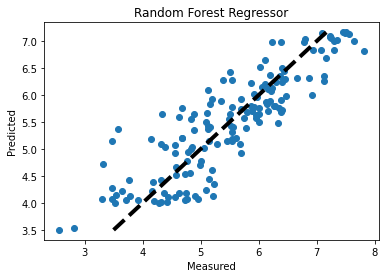

In [102]:
plt.scatter(y2020, pred2020)
plt.plot([pred2020.min(), pred2020.max()], [pred2020.min(), pred2020.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

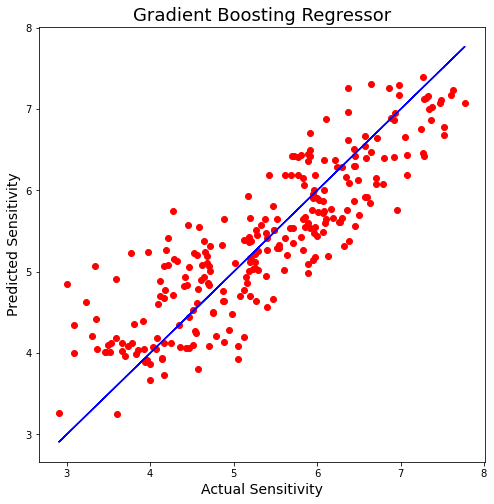

In [103]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,gbr_pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()

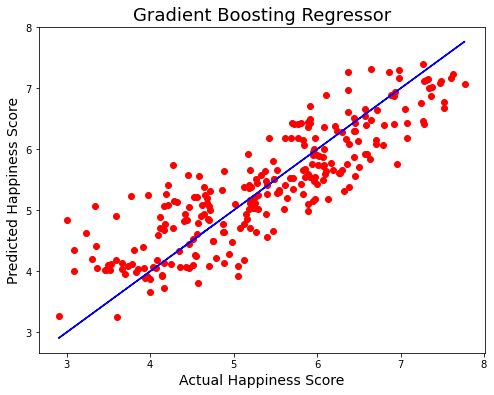

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=gbr_pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()